<a href="https://colab.research.google.com/github/mohamedchahed/ML-projects/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 Background 


As we navigate through the digital world, spam messages have become an increasingly common and annoying problem. In order to address this issue, I am working on build a spam classifier. The goal of this project is to develop a model that can accurately distinguish between legitimate (ham) messages and unwanted (spam) messages in a dataset of SMS messages.

# 💾 Data


* The provided dataset consists of more than 5,500 SMS messages in English, out of which approximately 13% have been classified as spam. Each message is stored in a text file, with each line containing two columns - the message label (either "ham" or "spam") and the original text of the message. Messages that have been labeled as "ham" are considered to be non-spam messages that are authentic


* The dataset can be accessed through the following [link](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/)



In [62]:
# Load the dataframe 
import pandas as pd 
df = pd.read_csv("/spam.csv")
df = df.rename(columns={'0': 'label', '1': 'text'})
df 

,label,text
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5567,spam,"""This is the 2nd time we have tried 2 contact ..."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"""Pity, * was in mood for that. So...any other ..."
5570,ham,The guy did some bitching but I acted like i'd...


# 🛠 Data Preprocessing 

### Target Encoding 

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['label'])

df['label'] = le.transform(df['label'])
df.head()

,label,text
0,0,"""Go until jurong point, crazy.. Available only..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"""Nah I don't think he goes to usf, he lives ar..."


## Corpus Cleaning

Text cleaning is an essential preprocessing step for a spam classifier. The aim is to remove any unnecessary elements from the text data, such as punctuation, special characters, and stopwords. This helps to create a more standardized dataset and removes inconsistencies in the text that could affect model accuracy. 

Additionally, converting all text to lowercase ensures consistency across the data, regardless of capitalization differences.

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import re
from nltk.corpus import stopwords

def clean_text(text):
  
    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub('[^a-zA-Z0-9\s]+', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [55]:
# Apply the clean_text function to all text in the 'text' column
df['text'] = df['text'].apply(clean_text)

# Show the updated dataframe
df.head()

,label,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkts may...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


## Stemming

Stemming is the process of reducing words to their base or root form, with the goal of reducing inflectional and derivational variations. The resulting base form, or stem, may not be a valid word on its own, but it can be used to group together different variations of a word.

> There are two types of stemming :
* Snowball Stemming 
* Porter Stemming 

Both Snowball stemming and Porter stemming can be suitable for spam classification.

However, since the goal of a spam classifier is to maximize recall and minimize the number of false negatives, it may be more appropriate to use a more aggressive stemming algorithm like Snowball stemming.


In [56]:
from nltk.stem import SnowballStemmer

# initialize SnowballStemmer 
stemmer = SnowballStemmer('english')

def stem_text(text):
    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(text)
    
    # Stem each token using the SnowballStemmer
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the stemmed tokens back into a single string
    return ' '.join(stemmed_tokens)

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
# apply stemming to the 'text' column in your DataFrame
df['text'] = df['text'].apply(stem_text)
# Show the updated dataframe
df.head()

,label,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkts may...
3,0,u dun say ear hor u c alreadi say
4,0,nah dont think goe usf live around though


# 📊 Modeling 





## Classical ML Models

In this section, we will be exploring the use of classical machine learning models with the TF-IDF vectorization technique as a starting point. While we recognize that more complex models, such as deep learning models, have been shown to achieve state-of-the-art performance in many natural language processing tasks, we believe it is important to first establish a strong baseline with simpler models before exploring more complex approaches.

### TF-IDF vectorization

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the text data
X = vectorizer.fit_transform(df['text'])

# Define target variable
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Building

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Fit different models
nb_model = MultinomialNB().fit(X_train, y_train)
svm_model = LinearSVC().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

### Model Evaluation

<Axes: >

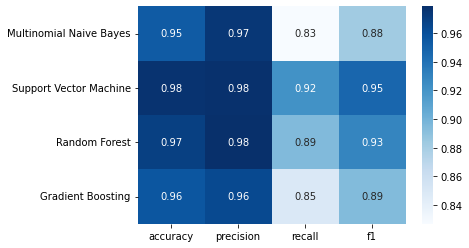

In [64]:
import seaborn as sns 
# Define a function that takes a model, X, and y and returns the accuracy, precision, recall, and F1 score using 10-fold cross-validation.
def evaluate_model(model, X, y):
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=5, scoring='precision_macro')
    recall = cross_val_score(model, X, y, cv=5, scoring='recall_macro')
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    return {'accuracy': accuracy.mean(), 'precision': precision.mean(), 'recall': recall.mean(), 'f1': f1.mean()}
# A dictionary that maps each model to its name
models = {'Multinomial Naive Bayes': nb_model, 'Support Vector Machine': svm_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}
# Create an empty dictionary to store the evaluation results
results = {}
# Loop through models and evaluate
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train)
# Create a DataFrame from the results dictionary.
results_df = pd.DataFrame.from_dict(results, orient='index')
sns.heatmap(results_df, cmap='Blues', annot=True)


## Deep Learning 

In this section, we will be exploring more advanced models to improve our results. Specifically, we will be leveraging the power of Long Short-Term Memory (LSTM) models and Global Vectors for Word Representation (GloVe) word embeddings. These techniques have proven to be highly effective in NLP tasks. We will also compare our results to those achieved using transfer learning with Bidirectional Encoder Representations from Transformers (BERT), a state-of-the-art language model. By utilizing these sophisticated models and techniques, we hope to achieve even greater accuracy and precision in our predictions.

### Word embeddings with GloVe

In [45]:
import numpy as np
import tensorflow as tf
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional, Dropout, GlobalMaxPool1D, BatchNormalization

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert the text data into sequences of integer values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure they all have the same length
maxlen = 100
X_train_padded = pad_sequences(X_train_sequences, padding='post', truncating='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, padding='post', truncating='post', maxlen=maxlen)

# Load the pre-trained GloVe embeddings
word_vectors = api.load('glove-wiki-gigaword-100')

# Create the embedding layer
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word_vectors:
        embedding_vector = word_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False)

[===========================================-------] 86.9% 111.3/128.1MB downloaded

### LSTM Model 

In [47]:
# Define the LSTM model
model = Sequential()
model.add(embedding_layer)
    
model.add(Bidirectional(LSTM(
        100, 
        return_sequences = True, 
        recurrent_dropout=0.2)))  
model.add(GlobalMaxPool1D())
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
140/140 [==============================] - 51s 320ms/step - loss: 0.3932 - accuracy: 0.8373 - val_loss: 0.2994 - val_accuracy: 0.9040
Epoch 2/5
140/140 [==============================] - 44s 313ms/step - loss: 0.1823 - accuracy: 0.9349 - val_loss: 0.1584 - val_accuracy: 0.9399
Epoch 3/5
140/140 [==============================] - 45s 320ms/step - loss: 0.1471 - accuracy: 0.9522 - val_loss: 0.1019 - val_accuracy: 0.9731
Epoch 4/5
140/140 [==============================] - 42s 302ms/step - loss: 0.1152 - accuracy: 0.9614 - val_loss: 0.0941 - val_accuracy: 0.9713
Epoch 5/5
140/140 [==============================] - 50s 360ms/step - loss: 0.1021 - accuracy: 0.9681 - val_loss: 0.0907 - val_accuracy: 0.9713


While I was able to achieve a satisfying level of accuracy after training the model for just 5 epochs, it's worth noting that there is potential for further improvement. By increasing the number of epochs, the model would potentially achieve even higher accuracy. Additionally, experimenting with different model architectures may also lead to better performance.



### Model Evaluation

In [48]:
y_pred = model.predict(X_test_padded)
y_pred_rounded = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)
f1 = f1_score(y_test, y_pred_rounded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1) 


35/35 [==============================] - 2s 50ms/step
Accuracy: 0.9713004484304932
Precision: 0.8979591836734694
Recall: 0.8859060402684564
F1 score: 0.8918918918918919


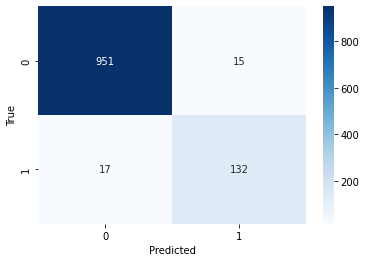

In [49]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
 
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded)
 
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()